# 1. Revised Exos: Plotting Flood Extent and Risk Codes

In [ ]:
# Imports

# Pour effectuer des requêtes HTTP
import requests

# Pour la visualisation
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import contextily as cx

# Pour manipuler des données géospatiales
import geopandas as gpd
from shapely.geometry import Polygon, box


# Pour récupérer des données OpenStreetMap
import osmnx as ox

## 1. Download the data from the urls and create the GeoDataFrames 

 World Bank EO4SD Data 

In [ ]:
# Data links

# Flood extent (risk) map - 2018 (vector, geom=polygons)
flood_extent_url = "https://datacatalogfiles.worldbank.org/ddh-published/0042289/DR0052924/eo4sd_saint_louis_flood_2018.zip?versionId=2023-01-19T10:24:47.0743031Z"

# Flood hazard map - 2018 (vector, geom=polygons)
flood_hazard_url = "https://datacatalogfiles.worldbank.org/ddh-published/0038461/DR0046959/eo4sd_saint_louis_fhazard_2018.zip?versionId=2023-01-19T06:11:38.4791729Z"

# Land Use / Land Cover map - 2018 (vector, geom=polygons)
land_use_2018_url = "https://datacatalogfiles.worldbank.org/ddh-published/0038704/DR0048008/eo4sd_saint_louis_lulchr_2018.zip?versionId=2023-01-19T04:13:44.4906109Z"

 Variables 

In [ ]:
# Make sure to add the extension (".zip")
flood_extent_zip_filepath = "data/raw/fextent.zip"
flood_hazard_zip_filepath = "data/raw/fhazard.zip"
land_use_2018_zip_filepath = "data/raw/land_use_18.zip"

# Make sure to add the geopackage extension (.gpkg)
flood_extent_filepath = "data/interim/fextent.gpkg"
flood_hazard_filepath = "data/interim/fhazard.gpkg"
land_use_2018_filepath = "data/interim/land_use_18.gpkg"

 Usefull functions

In [ ]:
def download_file(url, filepath):
    """
    Download content from the provided URL and save it to the specified file path.

    Parameters:
        url (str): The URL to download content from.
        filepath (str): The file path to save the downloaded content.

    Returns:
        None
    """
    # Send a GET request to the URL to fetch the content
    response = requests.get(url)

    # Write the content to the specified file path in binary mode
    with open(filepath, "wb") as f:
        f.write(response.content)

In [ ]:
download_file(flood_extent_url, flood_extent_zip_filepath)
download_file(flood_hazard_url, flood_hazard_zip_filepath)

Open zip file as geodataframe (using geopandas)


In [ ]:
flood_extent_gdf = gpd.read_file(flood_extent_zip_filepath)

In [ ]:
flood_hazard_gdf = gpd.read_file(flood_hazard_zip_filepath)

We are going to manually the AOI 


In [ ]:
xmin, ymin, xmax, ymax = [
    -16.83,
    14.80,
    -14.58,
    16.84,
]  # note: x,y values for EPSG 4326
city_bbox_geom = box(xmin, ymin, xmax, ymax)

In [ ]:
import geopandas as gpd

city_boundary_gdf = gpd.GeoDataFrame(
    geometry=[
        city_bbox_geom
    ],  # Creates a Shapely Polygon representing the bounding box of the city
    crs=4326,  # Specifies the Coordinate Reference System (CRS) for the GeoDataFrame
)

Save the data into a gdf file 

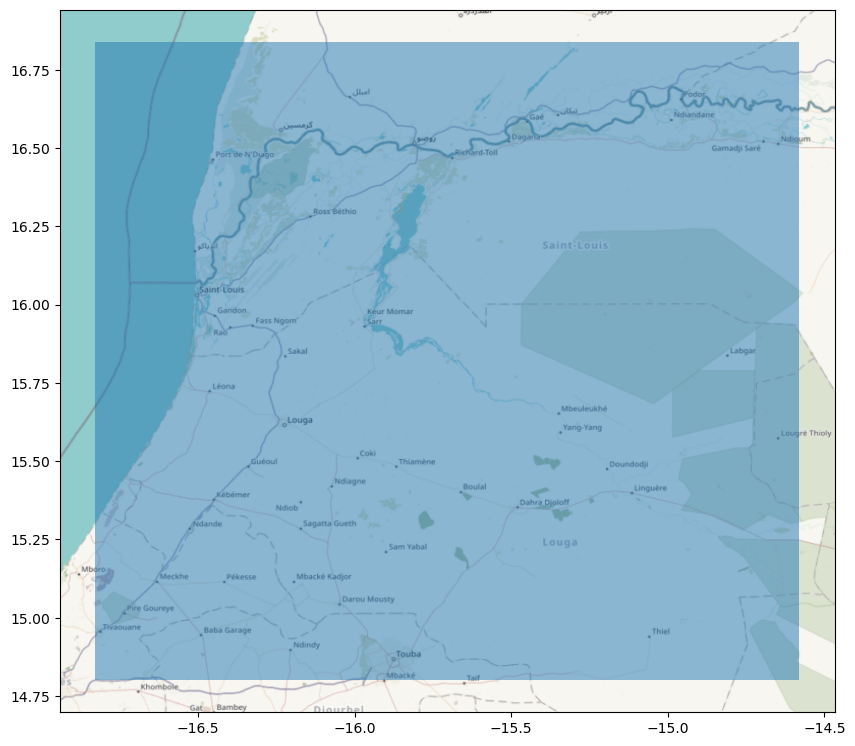

In [ ]:
# Plot the city boundary on a matplotlib Axes object ("ax")
ax = city_boundary_gdf.plot(figsize=(10, 10), alpha=0.5)
cx.add_basemap(ax, crs=city_boundary_gdf.crs.to_string(), attribution="")

In [ ]:
# Filter the data and create a new gdf
geom = city_boundary_gdf.to_crs(flood_extent_gdf.crs)["geometry"].iloc[0]
flood_extent_gdf = flood_extent_gdf[flood_extent_gdf.intersects(geom)]

In [ ]:
flood_extent_gdf

,WATERTYPE,WATERCODE,AREA,ID,geometry
0,Non-flooded,2,3.094421e+03,1,"POLYGON ((346389.718 1786009.872, 346385.717 1..."
1,Flooded,1,1.953508e+03,2,"POLYGON ((352248.408 1785774.292, 352244.452 1..."
2,Flooded,1,6.831062e+03,3,"POLYGON ((339930.266 1770965.868, 339952.125 1..."
3,Flooded,1,3.968432e+02,4,"POLYGON ((340463.980 1767945.549, 340444.454 1..."
4,Flooded,1,1.120947e+03,5,"POLYGON ((340500.000 1785000.000, 340499.496 1..."
...,...,...,...,...,...
1119,Non-flooded,2,1.007630e+06,1120,"POLYGON ((345796.837 1780469.275, 345834.582 1..."
1120,Non-flooded,2,2.480628e+07,1121,"POLYGON ((348153.415 1778205.116, 348154.544 1..."
1121,Non-flooded,2,2.252869e+06,1122,"POLYGON ((341210.113 1764621.767, 341209.855 1..."
1122,Non-flooded,2,5.046665e+07,1123,"POLYGON ((349272.686 1772017.660, 349270.174 1..."


In [ ]:
flood_hazard_gdf = gpd.read_file(flood_hazard_zip_filepath)
flood_hazard_gdf = flood_hazard_gdf[flood_hazard_gdf.intersects(geom)]

In [ ]:
flood_hazard_gdf

,ID,AREA,HAZARDCODE,RISKCODE_H,geometry
0,1,3302.969475,0.0,0.0,"POLYGON ((341689.025 1763893.040, 341552.900 1..."
1,2,22651.006216,0.0,0.0,"POLYGON ((343930.564 1763994.435, 343931.906 1..."
2,3,5325.286165,0.0,0.0,"POLYGON ((341042.086 1764273.365, 341043.593 1..."
3,4,10972.102732,0.0,0.0,"POLYGON ((340136.757 1764454.327, 340139.772 1..."
4,5,120780.291578,0.0,0.0,"POLYGON ((343935.771 1764494.632, 343937.913 1..."
...,...,...,...,...,...
23406,23407,14772.065897,5.0,3.0,"POLYGON ((341529.220 1786801.561, 341523.831 1..."
23407,23408,86587.004431,5.0,3.0,"POLYGON ((344407.663 1786609.749, 344404.502 1..."
23408,23409,120357.481607,6.0,3.0,"POLYGON ((342801.747 1787715.296, 342801.628 1..."
23409,23410,705126.064620,6.0,3.0,"POLYGON ((341327.635 1787488.676, 341327.548 1..."


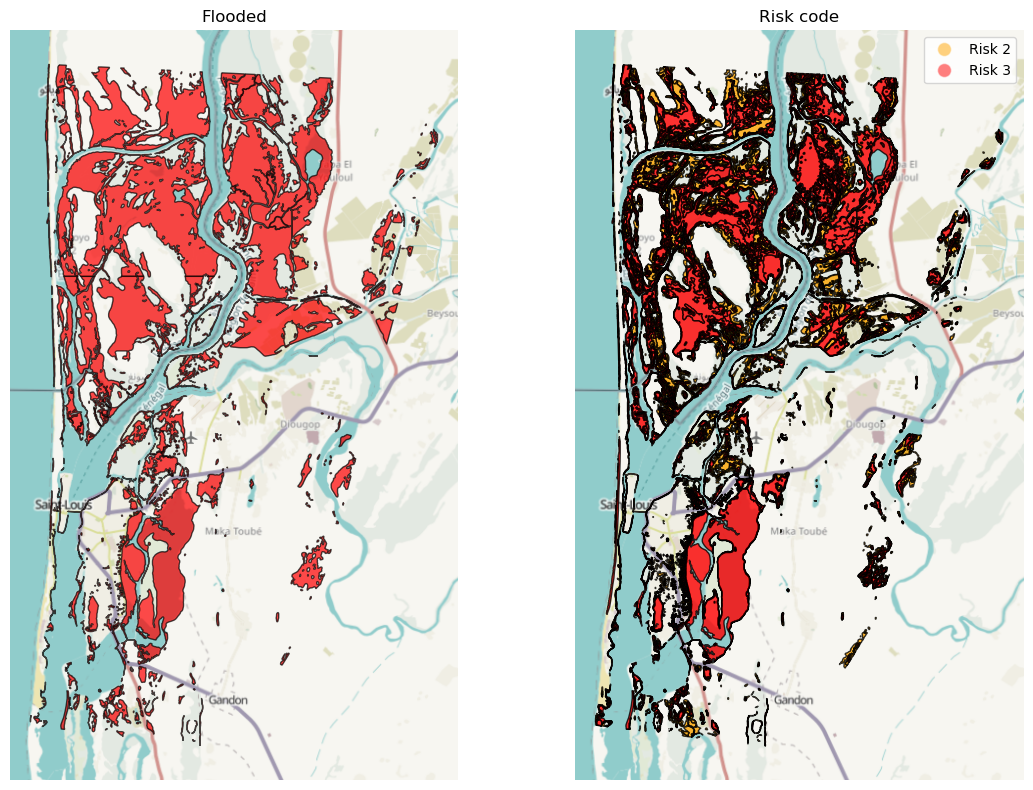

In [ ]:
# Select several attributs and plot them
flooded = flood_extent_gdf[flood_extent_gdf["WATERTYPE"] == "Flooded"]
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
# Plot Informal Settlement in red
flooded.plot(ax=ax1, color="red", edgecolor="black", alpha=0.7)
# flood_extent_gdf.plot(column="WATERTYPE", categorical=True, legend=True, figsize=(10, 10), edgecolor="k", alpha=0.8, ax=ax1)
cx.add_basemap(ax1, crs=flood_hazard_gdf.crs.to_string(), attribution="")
ax1.set_axis_off()
# Add title
ax1.set_title("Flooded")


# risk_1 = flood_hazard_gdf[flood_hazard_gdf["RISKCODE_H"] == 1]
risk_2 = flood_hazard_gdf[flood_hazard_gdf["RISKCODE_H"] == 2]
risk_3 = flood_hazard_gdf[flood_hazard_gdf["RISKCODE_H"] == 3]
# Plot the one with ETRS-LAEA projection
# risk_1.plot(ax=ax2, color='r', edgecolor="k", alpha=0.8)
risk_2.plot(ax=ax2, color="orange", edgecolor="k", alpha=0.8)
risk_3.plot(ax=ax2, color="red", edgecolor="k", alpha=0.8)
cx.add_basemap(ax2, crs=flood_hazard_gdf.crs.to_string(), attribution="")
ax2.set_axis_off()
# Add title
ax2.set_title("Risk code")
# Create custom legend handles
legend_handles = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="orange",
        markersize=10,
        label="Risk 2",
        alpha=0.5,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        markerfacecolor="red",
        markersize=10,
        label="Risk 3",
        alpha=0.5,
    ),
]
# Add legend with custom handles
ax2.legend(handles=legend_handles)

# Remove empty white space around the plot
plt.tight_layout()